# Practical Lab 8 - MNIST Classification with Dense Neural Networks 
* Name: Chen, Kun <br/>
* ID: 89770101

In [4]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. Introduction

### 2. Data Exploration
Load Dataset

In [6]:
label_text = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

mnist_test_df = pd.read_csv('fashion-mnist_test.csv')
display(mnist_test_df.head())
mnist_train_df = pd.read_csv('fashion-mnist_train.csv')
display(mnist_train_df.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check if there have invalid data in dataset

In [7]:
display(mnist_test_df.isnull().to_numpy().all())
display(mnist_train_df.isnull().to_numpy().all())

False

False

Convert Pandas Dataframe to Numpy Ndarray

In [8]:
y_test = mnist_test_df['label']
x_test = mnist_test_df.loc[:, mnist_test_df.columns != 'label'].to_numpy()
y_train = mnist_train_df['label']
x_train = mnist_train_df.loc[:, mnist_test_df.columns != 'label'].to_numpy()

Random inspection data

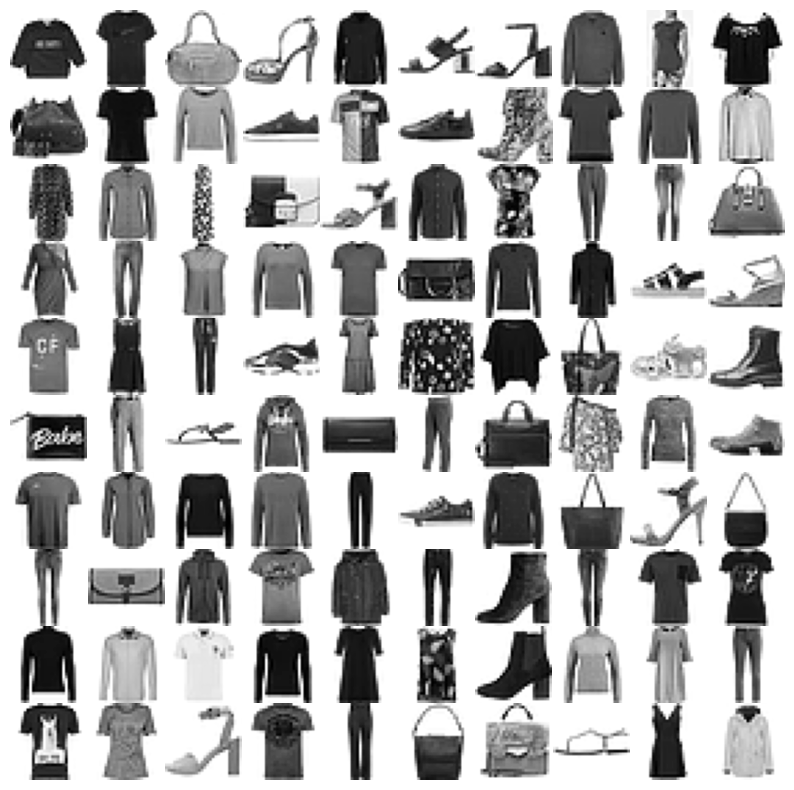

In [9]:
plt.figure(figsize=(10, 10))
for index, fashion in enumerate(x_train[:1000:10]):
    plt.subplot(10, 10, index + 1)
    image = fashion.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

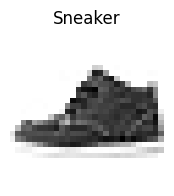

In [10]:
plt.figure(figsize=(2, 2))
index = random.randint(0, x_train.shape[0])
plt.imshow(x_train[index].reshape(28, 28), cmap="binary")
plt.title(label_text[y_train[index]])
plt.axis("off")
plt.show()

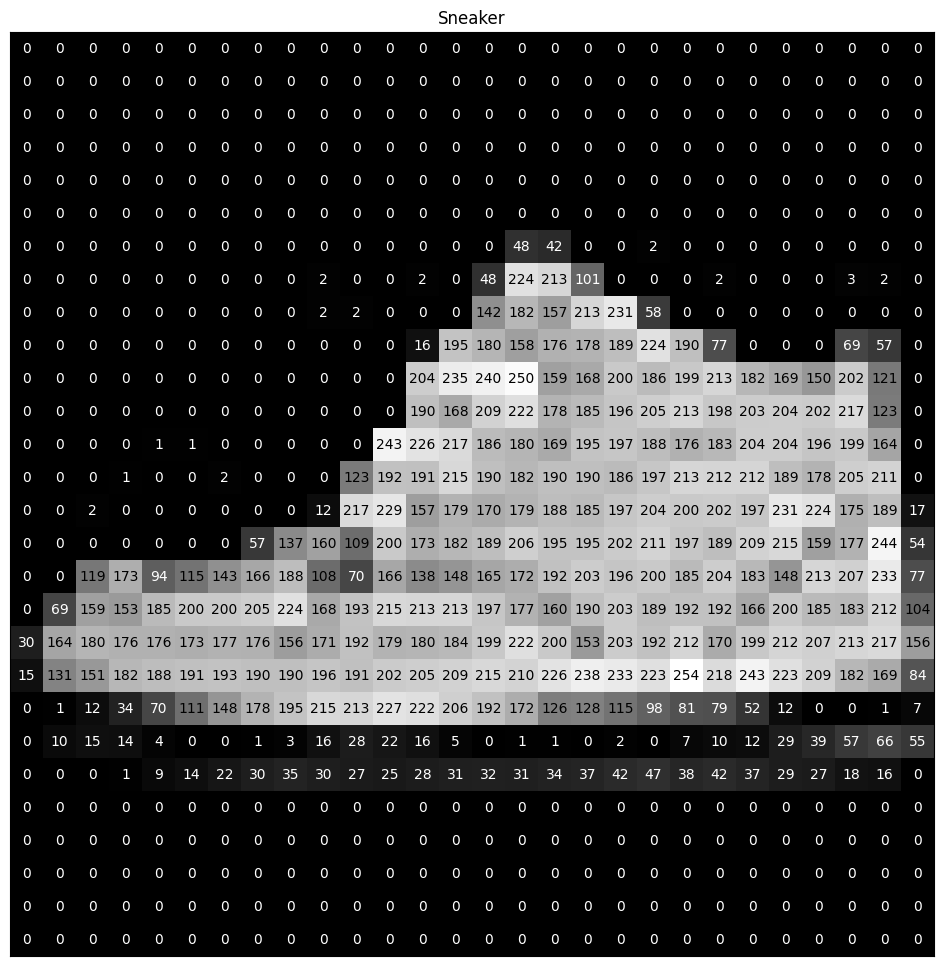

In [11]:
def visualize_input(i, ax, y):
    img = x_train[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(label_text[y[i]])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(index, ax, y_train)

Class Imbalance

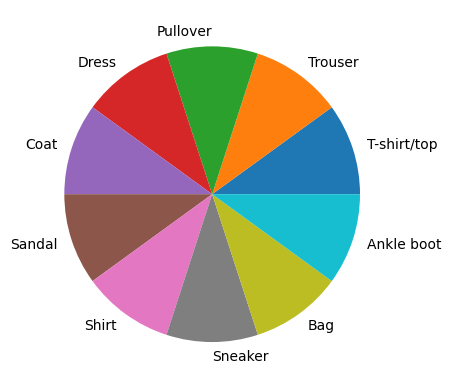

In [12]:
fig, ax = plt.subplots()
ax.pie(mnist_train_df['label'].value_counts().to_numpy(), labels=label_text)
plt.show()

### 3. Data Preprocessing

In [13]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

### 4. Modeling

Define the Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

2024-03-16 19:51:35.503618: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 19:51:35.504258: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Define the Loss Function, Optimizer and Metrics

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Traning the Model

In [16]:
model.fit(x_train, y_train, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.5110 - accuracy: 0.8215
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3777 - accuracy: 0.8661
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3365 - accuracy: 0.8785
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3120 - accuracy: 0.8850
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2933 - accuracy: 0.8921
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2759 - accuracy: 0.8988
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2645 - accuracy: 0.9024
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2504 - accuracy: 0.9075
Epoch 9/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2428 - accuracy: 0.9112
Epoch 10/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2345 - accuracy: 0.9126

### 5. Evaluation

In [17]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

313/313 [==============================] - 0s 1ms/step


* Accuracy

In [18]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_test, y_pred), tf.float32)).numpy()
print('Accuracy:{:.2f}%'.format(accuracy*100))

Accuracy:90.13%


* Precision

In [19]:
precision = tf.keras.metrics.Precision()(y_test, y_pred).numpy()
print('Precision:{:.2f}%'.format(precision*100))

Precision:98.83%


* Recall

In [20]:
recall = tf.keras.metrics.Recall()(y_test, y_pred).numpy()
print('Recall:{:.2f}%'.format(recall*100))

Recall:97.94%


* F1 Score

In [21]:
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 Score:{:.2f}%'.format(f1*100))

F1 Score:98.39%


### 6. Conclusions
In conclusion, the model performs very well on the MNIST validation dataset, achieving high accuracy, precision, recall, and F1 score. These results suggest that the model is effective at accurately classifying handwritten digits.

### 7. Q&A

* What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

We can increase precision for class '5' by increase threshold.

In [22]:
y_pred_threshod_05 = (y_pred_prob[:, 4] > 0.5).astype(int)
precision = tf.keras.metrics.Precision()(y_test, y_pred_threshod_05).numpy()
print('Precision:{:.2f}% (threshold = 0.5)'.format(precision*100))

y_pred_threshod_09 = (y_pred_prob[:, 4] > 0.9).astype(int)
precision = tf.keras.metrics.Precision()(y_test, y_pred_threshod_09).numpy()
print('Precision:{:.2f}% (threshold = 0.9)'.format(precision*100))

Precision:99.91% (threshold = 0.5)
Precision:100.00% (threshold = 0.9)


* What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this. 

We can increase recall for class '5' by decrease threshold.

In [23]:
recall = tf.keras.metrics.Recall()(y_test, y_pred_threshod_05).numpy()
print('Recall:{:.2f}% (threshold = 0.5)'.format(recall*100))

y_pred_threshod_01 = (y_pred_prob[:, 4] > 0.1).astype(int)
recall = tf.keras.metrics.Recall()(y_test, y_pred_threshod_01).numpy()
print('Recall:{:.2f}% (threshold = 0.1)'.format(recall*100))

Recall:12.51% (threshold = 0.5)
Recall:17.63% (threshold = 0.1)


# Lab 9 - Avoiding Overfitting by Saving a Model
* Name: Chen, Kun <br/>
* ID: 89770101

### 1. Introduction

In [73]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

### 2. Modeling
Define the model

In [74]:
models = list()
hyperparameters = [128, 256, 512]

for index, hyperparameter in enumerate(hyperparameters):
    models.append(tf.keras.Sequential([
                    tf.keras.layers.Dense(hyperparameter, activation="relu"),
                    tf.keras.layers.Dense(hyperparameter, activation='relu'),
                    tf.keras.layers.Dense(10, activation="softmax")]))
    # Define the Loss Function, Optimizer and Metrics
    models[index].compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Traning the Model

In [75]:
def gen_checkpoint(model_index):
    path = './checkpoints/model{}/'.format(model_index)
    model_checkpoint_callback = ModelCheckpoint(filepath=path+ 'checkpoint_epoch_{epoch:02d}.model.keras', monitor='val_loss', mode='min')
    return model_checkpoint_callback

historys = list()
for index, model in enumerate(models):
    historys.append(model.fit(x_train, y_train, epochs=50, verbose=1, batch_size=128, shuffle=True, validation_data=(x_test, y_test), callbacks=gen_checkpoint(index)))

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.5690 - accuracy: 0.7960 - val_loss: 0.4769 - val_accuracy: 0.8342
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3988 - accuracy: 0.8547 - val_loss: 0.3605 - val_accuracy: 0.8627
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3548 - accuracy: 0.8700 - val_loss: 0.3410 - val_accuracy: 0.8766
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3255 - accuracy: 0.8794 - val_loss: 0.3298 - val_accuracy: 0.8778
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3088 - accuracy: 0.8865 - val_loss: 0.3352 - val_accuracy: 0.8775
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2916 - accuracy: 0.8920 - val_loss: 0.3526 - val_accuracy: 0.8710
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2790 - accuracy: 0.8971 - val_loss: 0.3274 - val_accuracy: 0.8825
Epoch 

Plot the training and validation loss and accuracy for each one

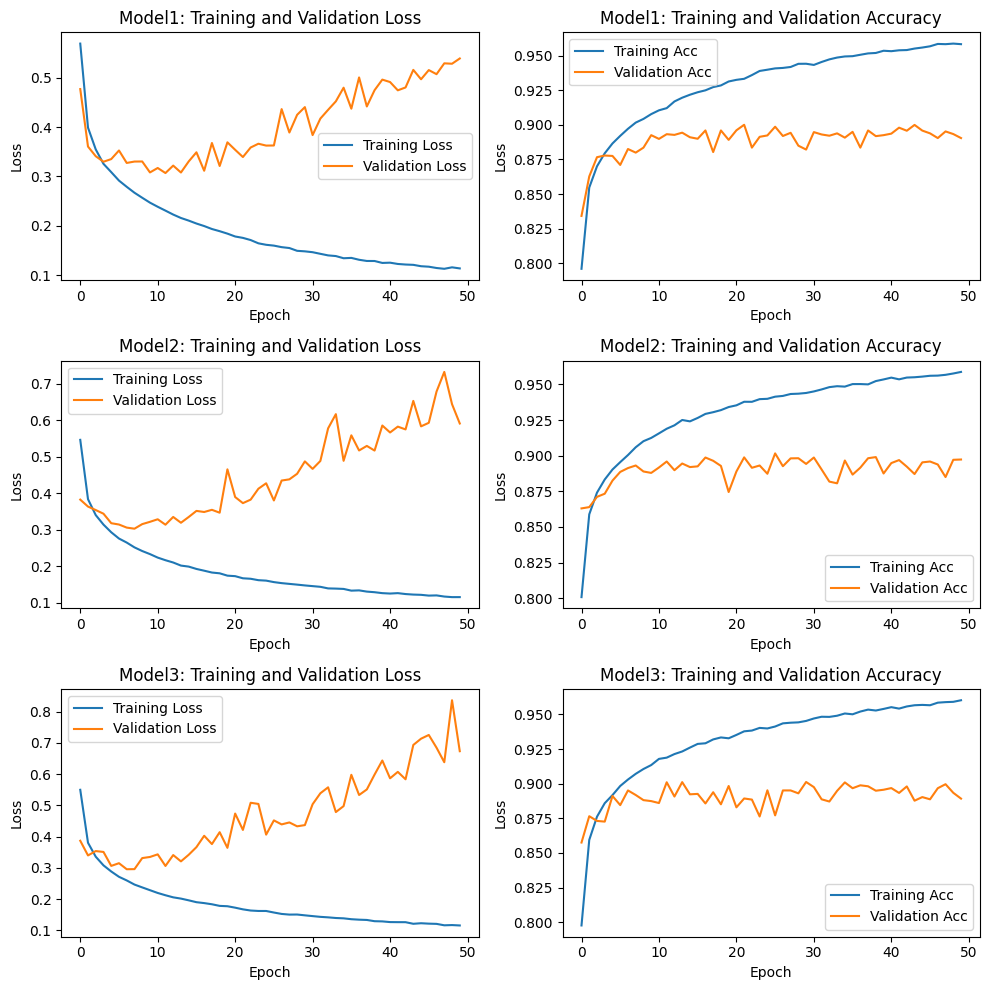

In [76]:
plt.figure(figsize=(10, 10))
for index, history in enumerate(historys):
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    plt.subplot(3, 2, (index)*2 + 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model{}: Training and Validation Loss'.format(index+1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()

    plt.subplot(3,2, (index)*2 + 2)
    plt.plot(train_acc, label='Training Acc')
    plt.plot(val_acc, label='Validation Acc')
    plt.title('Model{}: Training and Validation Accuracy'.format(index+1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
plt.show()

Based on observation, I can conclude:
* The best epoch for first model is 18
* The best epoch for second model is 17
* The best epoch for third model is 15
Reason: After the above select epoch number, we can see the accuracy of test set start falling down, and the traning test accuracy keep raiseing up. Also, the loss values are also increas after the select epoch number.

### 3. Evaluation

In [79]:
from keras.models import load_model
best_models = list()
best_models.append(load_model("checkpoints/model0/checkpoint_epoch_17.model.keras"))
best_models.append(load_model("checkpoints/model1/checkpoint_epoch_18.model.keras"))
best_models.append(load_model("checkpoints/model2/checkpoint_epoch_15.model.keras"))

In [80]:
for index, best_model in enumerate(best_models):
    y_pred_prob = best_model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=-1)

    print('Model{}:'.format(index+1))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_test, y_pred), tf.float32)).numpy()
    print('\tAccuracy:{:.2f}%'.format(accuracy*100))

    precision = tf.keras.metrics.Precision()(y_test, y_pred).numpy()
    print('\tPrecision:{:.2f}%'.format(precision*100))

    recall = tf.keras.metrics.Recall()(y_test, y_pred).numpy()
    print('\tRecall:{:.2f}%'.format(recall*100))

    f1 = 2 * (precision * recall) / (precision + recall)
    print('\tF1 Score:{:.2f}%'.format(f1*100))

313/313 [==============================] - 1s 2ms/step
Model1:
	Accuracy:89.59%
	Precision:97.93%
	Recall:98.44%
	F1 Score:98.19%
313/313 [==============================] - 1s 2ms/step
Model2:
	Accuracy:89.64%
	Precision:97.82%
	Recall:98.81%
	F1 Score:98.31%
313/313 [==============================] - 1s 2ms/step
Model3:
	Accuracy:89.23%
	Precision:99.30%
	Recall:96.78%
	F1 Score:98.02%


|            | Accuracy | Precision | Recall | F1 Score |
| -----------| -------- | --------- | ------ | -------- |
| Model1     | 89.59%   | 97.93%    | 98.44% | 98.19%   | 
| Model2     | 89.64%   | 97.82%    | 98.81% | 98.31%   |
| Model3     | 89.23%   | 99.30%    | 96.78% | 98.02%   |


### 4. Conclusions

Base on above table:<br/>
* Increasing the parameter scale appropriately can improve the performance of the model. However
* Increasing the parameter scale too much affects the model performance, and increasing the parameters too much may also cause the model to "remember" all the features and overfit